# ORB-facebook-comments-sentiment-analysis

In [89]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import nltk

In [2]:
#load csv file
Train = pd.read_csv("Posts_comment2.csv",names=['text','label'])
data=Train
data.head()

text  label
0                      bayyeessa itti nu dabaala Mee      1
1                Gaariidha halumaa kanaan itti fufaa      1
2                                      Guddoo dansaa      1
3  osoo addaa hin cittiin yoo barreesitaan gaarii...      1
4                                Gaaridha itti fufaa      1

In [3]:
aforstopwords = pd.read_csv("aforstopwords.txt")
aforstopwords.head()

stopwords
0       akka
1      akkam
2  Akkasumas
3     Akkuma
4       Ammo

In [4]:
test_data = pd.read_csv("Posts_comment_test.csv",names=['text'])
test_data.head()

text
0                                      Jabaadha.
1  Odeeffannoo fi Hubannoo nuf uumeera Galaatoma
2                         Odeeffannoo gaariidha!
3                         Odeeffannoo gaariidha.
4                    B/gaariidha Itti Nuuf Fufaa

In [5]:
len(test_data)

274

In [6]:
data.label.value_counts()

1    377
0    272
Name: label, dtype: int64

In [7]:
data.shape

(649, 2)

In [8]:
data['label'].value_counts()

1    377
0    272
Name: label, dtype: int64

C:\Users\ENVY\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


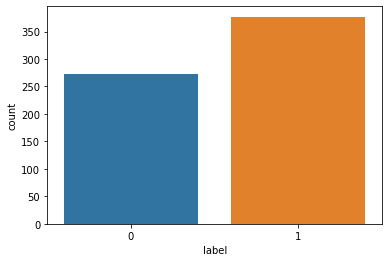

In [9]:
import seaborn as sns
ax=sns.countplot(data.label)

In [10]:
# removing usernames from tweet

data['text'] = data.text.str.replace('@user', '')
data.head()

text  label
0                      bayyeessa itti nu dabaala Mee      1
1                Gaariidha halumaa kanaan itti fufaa      1
2                                      Guddoo dansaa      1
3  osoo addaa hin cittiin yoo barreesitaan gaarii...      1
4                                Gaaridha itti fufaa      1

In [11]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")
data['text'] = data['text'].str.replace("#", "")
data.head()


C:\Users\ENVY\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


text  label
0                      bayyeessa itti nu dabaala Mee      1
1                Gaariidha halumaa kanaan itti fufaa      1
2                                      Guddoo dansaa      1
3  osoo addaa hin cittiin yoo barreesitaan gaarii...      1
4                                Gaaridha itti fufaa      1

In [12]:
test_data['text'] = test_data['text'].str.replace("[^a-zA-Z#]", " ")
test_data['text'] = test_data['text'].str.replace("#", "")
test_data.head()

C:\Users\ENVY\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text
0                                      Jabaadha 
1  Odeeffannoo fi Hubannoo nuf uumeera Galaatoma
2                         Odeeffannoo gaariidha 
3                         Odeeffannoo gaariidha 
4                    B gaariidha Itti Nuuf Fufaa

In [13]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('hin', 88),
 ('gaariidha', 69),
 ('itti', 59),
 ('kun', 58),
 ('ta', 53),
 ('waan', 52),
 ('fi', 52),
 ('ee', 50),
 ('kan', 41),
 ('dha', 40)]

In [14]:
#tokenization
data['text'] = data['text'].apply(lambda x: x.split())
data.head()

text  label
0                [bayyeessa, itti, nu, dabaala, Mee]      1
1          [Gaariidha, halumaa, kanaan, itti, fufaa]      1
2                                   [Guddoo, dansaa]      1
3  [osoo, addaa, hin, cittiin, yoo, barreesitaan,...      1
4                            [Gaaridha, itti, fufaa]      1

In [15]:
test_data['text'] = test_data['text'].apply(lambda x: x.split())
test_data.head()

text
0                                         [Jabaadha]
1  [Odeeffannoo, fi, Hubannoo, nuf, uumeera, Gala...
2                           [Odeeffannoo, gaariidha]
3                           [Odeeffannoo, gaariidha]
4                  [B, gaariidha, Itti, Nuuf, Fufaa]

In [16]:
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['text']= data['text'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head(10)

text  label
0                [bayyeessa, itti, nu, dabaala, mee]      1
1          [gaariidha, halumaa, kanaan, itti, fufaa]      1
2                                   [guddoo, dansaa]      1
3  [osoo, addaa, hin, cittiin, yoo, barreesitaan,...      1
4                            [gaaridha, itti, fufaa]      1
5  [waan, salphaa, fakkaata, garuu, hojii, guddaa...      1
6               [ka, umsa, bareedaadha, itti, fufaa]      1
7                                        [bayyeessa]      1
8      [hojii, sirrii, hojjechuuf, jalqabii, gaarii]      1
9                                 [baayye, gaaridha]      1

In [17]:
test_data['text']= test_data['text'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head()

text
0                                         [jabaadha]
1  [odeeffannoo, fi, hubannoo, nuf, uumeera, gala...
2                           [odeeffannoo, gaariidha]
3                           [odeeffannoo, gaariidha]
4                  [b, gaariidha, itti, nuuf, fufaa]

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in aforstopwords]
    

In [20]:
data['text'] = data['text'].apply(process) 
data.head()

text  label
0                [bayyeessa, mee, itti, nu, dabaala]      1
1          [kanaan, halumaa, fufaa, itti, gaariidha]      1
2                                   [guddoo, dansaa]      1
3  [osoo, addaa, yoo, barreesitaan, cittiin, gaar...      1
4                            [itti, gaaridha, fufaa]      1

In [21]:
# test_data
test_data['text'] = test_data['text'].apply(process) 
test_data.head()

text
0                                         [jabaadha]
1  [nuf, hubannoo, fi, uumeera, odeeffannoo, gala...
2                           [odeeffannoo, gaariidha]
3                           [odeeffannoo, gaariidha]
4                  [fufaa, itti, gaariidha, b, nuuf]

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

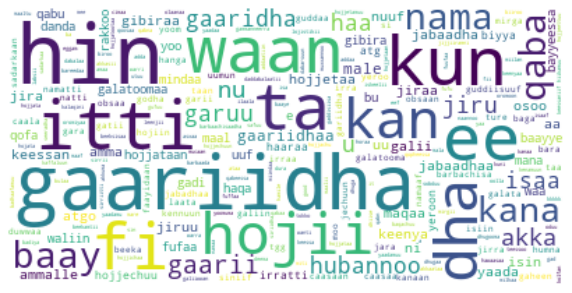

In [23]:
# split sentences to get individual words
words = []
for line in data['text']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=aforstopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['text'] = data['text'].apply(string)
data.head()  

text  label
0                      bayyeessa mee itti nu dabaala      1
1                kanaan halumaa fufaa itti gaariidha      1
2                                      guddoo dansaa      1
3  osoo addaa yoo barreesitaan cittiin gaariidha hin      1
4                                itti gaaridha fufaa      1

In [25]:
test_data['text'] = test_data['text'].apply(string)
test_data.head()

text
0                                       jabaadha
1  nuf hubannoo fi uumeera odeeffannoo galaatoma
2                          odeeffannoo gaariidha
3                          odeeffannoo gaariidha
4                    fufaa itti gaariidha b nuuf

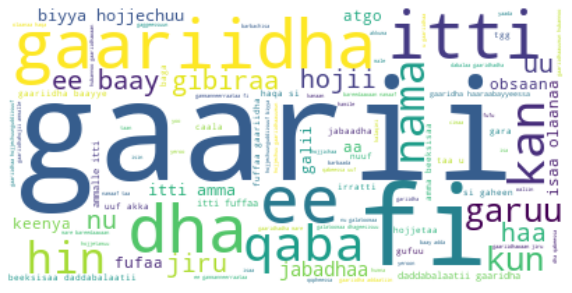

In [26]:
positive = [r for r in data['text'][data['label']==1]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=aforstopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

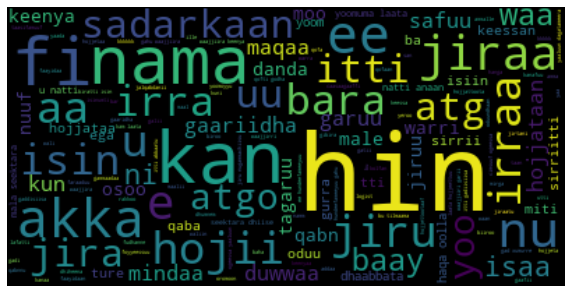

In [27]:
negative = [r for r in data['text'][data['label']==0]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=aforstopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["text"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (519,) (519,)
testing set : (130,) (130,)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [30]:
test_x = test_data['text']
test_x

0                                               jabaadha
1          nuf hubannoo fi uumeera odeeffannoo galaatoma
2                                  odeeffannoo gaariidha
3                                  odeeffannoo gaariidha
4                            fufaa itti gaariidha b nuuf
                             ...                        
269               keessan yaada tti gaaridha yaanni akka
270                          labbsiin bbbbb kun garidhaa
271    qabaa ta ee daldaltotaa hubanaa maamiltoota ke...
272    waan haara jiru ummataaf akkanuma ibsaa galato...
273    yaadame gaarii fi hojjattota ee raawwataniif m...
Name: text, Length: 274, dtype: object

In [31]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(519, 1355)
(519, 1355)


In [32]:
x_train.head()

332                                           galaatooma
29                       nuti faana isin jirra jabaadhaa
302                                maalif nu sobduuuuuuu
286    haalii wantii akkumaa qabanii sirresuu jirutii...
554                                  jabaadhaa dansa dha
Name: text, dtype: object

In [33]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)

print(test_x_counts.shape)
print(test_x_tfidf.shape)

(274, 1355)
(274, 1355)


In [34]:
test_x_counts

<274x1355 sparse matrix of type '<class 'numpy.int64'>'
	with 2117 stored elements in Compressed Sparse Row format>

In [35]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(130, 1355)
(130, 1355)


#Model building

#Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [37]:
predictions = model.predict(x_test_tfidf)

In [38]:
submission  = model.predict(test_x_tfidf)

In [39]:
#Accuracy_score
from sklearn.metrics import accuracy_score
rfac=accuracy_score(y_test,predictions)*100

In [40]:
rfac

80.0

In [180]:
def rfpredict_sentiment(text):
    fbcom = tokenizer.texts_to_sequences([text])
    fbcom = pad_sequences(fbcom,maxlen=1355)
    prediction = int(model.predict(fbcom).round().item())
    #return prediction
    if prediction==1:
        return "Predicted label: Posetive"
    else:
        return "Predicted label: Negative"
    #print("Predicted label: ",[prediction])

In [181]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=rfpredict_sentiment, 
                   inputs='text', 
                   outputs=gradio.outputs.Textbox(),
                   description="This is sentment anlysis of ORB customer comments")

In [182]:
app.launch()

Running on local URL:  http://127.0.0.1:7876/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x22904240648>,
 'http://127.0.0.1:7876/',
 None)

In [41]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[36, 16],
       [10, 68]], dtype=int64)

In [42]:
#f1-score
f1_score(y_test,predictions)

0.8395061728395062

In [43]:
from __future__ import print_function


# Special END separator
END = '0e8ed89a-47ba-4cdb-938e-b8af8e084d5c'

# Text attributes
ALL_OFF = '\033[0m'
BOLD = '\033[1m'
UNDERSCORE = '\033[4m'
BLINK = '\033[5m'
REVERSE = '\033[7m'
CONCEALED = '\033[7m'

# Foreground colors
FG_BLACK = '\033[30m'
FG_RED = '\033[31m'
FG_GREEN = '\033[32m'
FG_YELLOW = '\033[33m'
FG_BLUE = '\033[34m'
FG_MAGENTA = '\033[35m'
FG_CYAN = '\033[36m'
FG_WHITE = '\033[37m'

# Background colors
BG_BLACK = '\033[40m'
BG_RED = '\033[41m'
BG_GREEN = '\033[42m'
BG_YELLOW = '\033[43m'
BG_BLUE = '\033[44m'
BG_MAGENTA = '\033[45m'
BG_CYAN = '\033[46m'
BG_WHITE = '\033[47m'


class pretty_output():
    '''
    Context manager for pretty terminal prints
    '''

    def __init__(self, *attr):
        self.attributes = attr

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        pass

    def write(self, msg):
        style = ''.join(self.attributes)
        print('{}{}{}'.format(style, msg.replace(END, ALL_OFF + style), ALL_OFF))


if __name__ == '__main__':

    with pretty_output(FG_RED) as out:
        out.write('This is a test in RED')

    with pretty_output(FG_BLUE) as out:
        out.write('This is a test in BLUE')

    with pretty_output(BOLD, FG_GREEN) as out:
        out.write('This is a bold text in green')

    with pretty_output(BOLD, BG_GREEN) as out:
        out.write('This is a text with green background')

    with pretty_output(FG_GREEN) as out:
        out.write('This is a green text with ' + BOLD + 'bold' + END + ' text included')

    with pretty_output() as out:
        out.write(BOLD + 'Use this' + END + ' even with ' + BOLD + FG_RED + 'no parameters' + END + ' in the with statement')

This is a test in RED
This is a test in BLUE
This is a bold text in green
This is a text with green background
This is a green text with bold text included
Use this even with no parameters in the with statement


In [44]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T

with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST                 ')
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'],)


                 RANDOM FOREST                 


In [45]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [46]:
comments = pd.DataFrame(columns=['Comments','Prediction','Label'])
comments['Comments'] = x_test
comments['Prediction'] = predictions
comments['Label'] = y_test
comments.replace([1,0],['POS', 'NEG'], inplace=True)
with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST Comments Prediction                ')
(comments.sample(10).style.applymap(color_negative_red, subset=['Prediction', 'Label']))

                 RANDOM FOREST Comments Prediction                


In [47]:
predictions

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [48]:
test_data.head()

text
0                                       jabaadha
1  nuf hubannoo fi uumeera odeeffannoo galaatoma
2                          odeeffannoo gaariidha
3                          odeeffannoo gaariidha
4                    fufaa itti gaariidha b nuuf

In [49]:
submission_df = pd.DataFrame(columns=['text', 'label'])
submission_df['text'] = test_data.text
submission_df['label'] = submission
submission_df.head(15)

text  label
0                                            jabaadha      1
1       nuf hubannoo fi uumeera odeeffannoo galaatoma      1
2                               odeeffannoo gaariidha      1
3                               odeeffannoo gaariidha      1
4                         fufaa itti gaariidha b nuuf      1
5                                      nuuf galatooma      1
6                                               jirtu      1
7                     nuti faana isin jirra jabaadhaa      1
8                                             sin moo      0
9   oromiyaa dabalaaf mindaa caalaa sassaabbamaa g...      1
10  male rakkoo loojistika goona haa beekamne beek...      1
11  keessan nyaattanii ni seenu hin beekkamtiiin n...      0
12                    dhabn irraa biiroo takka motora      0
13        jabaadha jabaannuu gammanne waliin baga haa      1
14  waqnii nuu wajiraa bara casaa kan kissii tiin ...      0

In [50]:
submission_df.to_csv('submission.csv',index=False)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [52]:
log_predictions = logmodel.predict(x_test_tfidf)

In [53]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[37, 15],
       [ 5, 73]], dtype=int64)

In [54]:
f1_score(y_test,log_predictions)

0.8795180722891567

In [55]:
from sklearn.metrics import accuracy_score
lrac=accuracy_score(y_test,log_predictions)*100

In [56]:
lrac

84.61538461538461

In [57]:
x_test_tfidf.get_shape

<bound method spmatrix.get_shape of <130x1355 sparse matrix of type '<class 'numpy.float64'>'
	with 619 stored elements in Compressed Sparse Row format>>

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
tokenizer = Tokenizer(num_words=5000)

In [183]:
tokenizer

In [175]:
def predict_sentiment(text):
    fbcom = tokenizer.texts_to_sequences([text])
    fbcom = pad_sequences(fbcom,maxlen=1355)
    prediction = int(logmodel.predict(fbcom).round().item())
    #return prediction
    if prediction==1:
        return "Predicted label: Posetive"
    else:
        return "Predicted label: Negative"
    #print("Predicted label: ",[prediction])

In [176]:
test_sentence1 = "baay'ee gaarii dha."
predict_sentiment(test_sentence1)

'Predicted label: Posetive'

In [177]:
test_sentence2 = "sin moo!"
predict_sentiment(test_sentence2)

'Predicted label: Posetive'

In [163]:
import gradio as gr
import gradio
import joblib

In [178]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=predict_sentiment, 
                   inputs='text', 
                   outputs=gradio.outputs.Textbox(),
                   description="This is sentment anlysis of ORB customer comments")

In [179]:
app.launch()

Running on local URL:  http://127.0.0.1:7875/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x22904240648>,
 'http://127.0.0.1:7875/',
 None)

In [113]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['text', 'label'])
submission_df['text'] = test_data.text
submission_df['label'] = submission
submission_df.to_csv('submission-log.csv',index=False)
submission_df.head(5)

text  label
0                                       jabaadha      1
1  nuf hubannoo fi uumeera odeeffannoo galaatoma      1
2                          odeeffannoo gaariidha      1
3                          odeeffannoo gaariidha      1
4                    fufaa itti gaariidha b nuuf      1

In [115]:
submission_df.label.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [116]:
submission_df.text.values

array(['jabaadha', 'nuf hubannoo fi uumeera odeeffannoo galaatoma',
       'odeeffannoo gaariidha', 'odeeffannoo gaariidha',
       'fufaa itti gaariidha b nuuf', 'nuuf galatooma', 'jirtu',
       'nuti faana isin jirra jabaadhaa', 'sin moo',
       'oromiyaa dabalaaf mindaa caalaa sassaabbamaa galiiwwan naannoo kana',
       'male rakkoo loojistika goona haa beekamne beekamu maal',
       'keessan nyaattanii ni seenu hin beekkamtiiin nuuf kiisii koottaa',
       'dhabn irraa biiroo takka motora',
       'jabaadha jabaannuu gammanne waliin baga haa',
       'waqnii nuu wajiraa bara casaa kan kissii tiin faraaduu qofaa galuu haa galii beekamtiin kanafuu jiruu',
       'waa gurri goon hin harreefuu',
       'qabaa hojjettoota dabalamn biiroole maaf beekamtii kennuun gad kaniin akka jirtu argaa maal gatii miindaa mitii hin e ta',
       'osoo haalli isinumti hojjetan ogeessonni mee aa taa mijateefi irra kana isaa teessoo anii qabaatin warri hin bu tilmaama fidan',
       'waaqa hojjachu g

### Gradient Boosting Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(n_estimators=550)

In [70]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [71]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[37, 15],
       [ 5, 73]], dtype=int64)

In [72]:
f1_score(y_test,alg_predictions)

0.8795180722891567

In [73]:
from sklearn.metrics import accuracy_score
xgac=accuracy_score(y_test,alg_predictions)*100

In [74]:
xgac

84.61538461538461

In [75]:
import seaborn as sns

C:\Users\ENVY\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


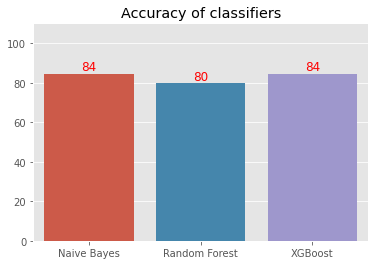

In [76]:
models = ["Naive Bayes", 'Random Forest', 'XGBoost']
acc = [lrac, rfac, xgac]
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.barplot(models, acc, );
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = 110 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.title('Accuracy of classifiers')
plt.show()

In [77]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['text', 'label'])
submission_df['text'] = test_data.text
submission_df['label'] = submission
submission_df.to_csv('submission_gb.csv',index=False)
submission_df.head(5)

text  label
0                                       jabaadha      1
1  nuf hubannoo fi uumeera odeeffannoo galaatoma      1
2                          odeeffannoo gaariidha      1
3                          odeeffannoo gaariidha      1
4                    fufaa itti gaariidha b nuuf      1